In [9]:
# Import libraries 
import librosa
from librosa import stft
import librosa.display
import numpy
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
import sklearn
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import skimage.io

In [3]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

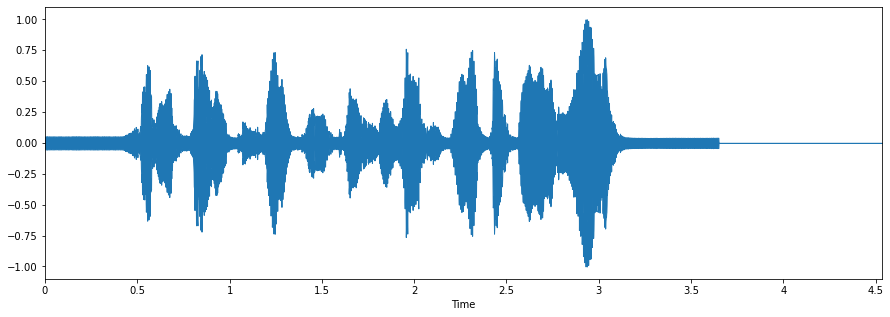

In [5]:
fname = 'Audio/DCa01.wav'  
X, sample_rate = librosa.load(fname, res_type='kaiser_fast',sr=22050*2, duration=4.5)  
X = librosa.util.fix_length(X, 200000)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(X, sr=sample_rate)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

In [6]:
ipd.Audio(fname)

In [7]:
X.shape

(200000,)

Text(0.5, 1.0, 'Audio sampled at 44100 hrz')

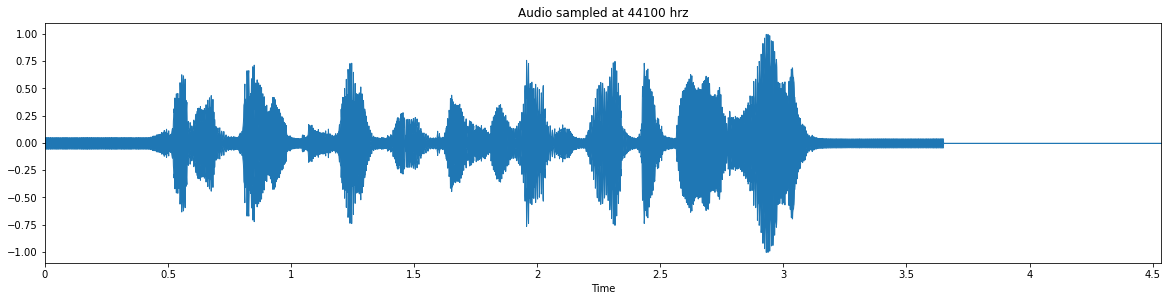

In [8]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

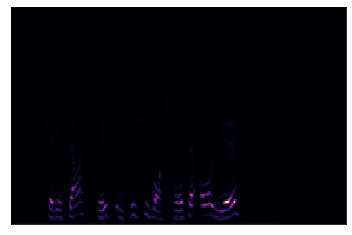

In [16]:
# use the mel-scale instead of raw frequency

sgram = librosa.stft(X)

sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

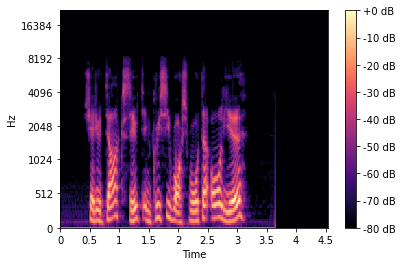

In [19]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=numpy.max)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [20]:
print(type(mel_sgram), mel_sgram.shape)

<class 'numpy.ndarray'> (128, 391)


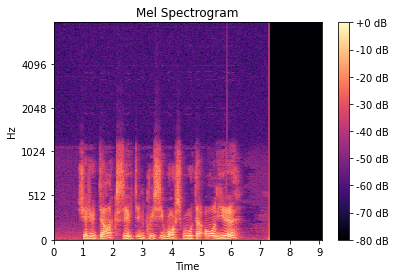

In [26]:
mel_spect = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(sgram, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

MFCC is of type <class 'numpy.ndarray'> with shape (20, 391)


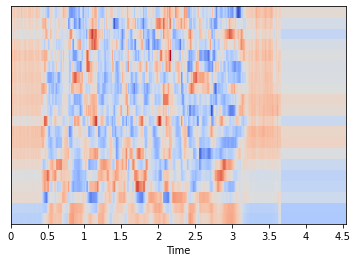

In [18]:
mfcc = librosa.feature.mfcc(X, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)

In [19]:
matplotlib.image.imsave('name.png', mfcc)
im = Image.open(r"name.png")
newsize = (224, 224)
im = im.resize(newsize)

NameError: name 'Image' is not defined

In [20]:
im

NameError: name 'im' is not defined

In [21]:
matplotlib.image.imsave('mels.png', mel_sgram)
im = Image.open(r"mels.png")
newsize = (224, 224)
im = im.resize(newsize)

NameError: name 'Image' is not defined

In [22]:
im

NameError: name 'im' is not defined